# CC3001 2023-1 - Tarea 6: Quicksort
# Nombre: Fernando Rojas
Profesores: Iván Sipirán, Nelson Baloian, Patricio Poblete




En esta tarea, usted debe comparar el desempeño de la versión original de Quicksort con el de la variante "Mediana de 3". En la primera, el método de partición debe elegir el pivote como el primer elemento del sub arreglo que está particionando. En la segunda, el pivote debe elegirse como la mediana entre el primero, el del medio y el último elemento. Usted debe entregar un link a su tarea en `colab`.

---
# Quicksort original




La versión que se vio en cátedra de Quicksort elige el pivote como un elemento escogido al azar de entre los del arreglo. Para esta tarea vamos a elegir el pivote como el primer elemento del subarreglo para evitar usar la función random.randint() de python que puede ser muy lenta. Dado que para esta tarea los arreglos a ordenar se generarán de manera aleatoria, el primer elemento de la serie se puede ver como un elemento escogido al azar. Sin embargo, esta no es una práctica recomendable en la realidad, ya que si el arreglo viene ordenado, esto llevará a que se tenga el peor caso de Quicksort. La implementación que usaremos de Quicksort es la siguiente:

In [ ]:
def quicksort(a):
    r = {"count":0}
    qsort(a,0,len(a)-1,r)
    return r["count"]


def qsort(a,i,j,r): # ordena a[i],...,a[j]
    if i<j: # quedan 2 o más elementos por ordenar
        k, r = particion(a,i,j,r)
        qsort(a,i,k-1,r)
        qsort(a,k+1,j,r)

def particion(a,i,j,r): # particiona a[i],...,a[j], retorna posición del pivote
    # a[i] es el pivote
    cont = 0
    s=i # invariante: a[i+1..s]<=a[i], a[s+1..t]>a[i]
    for t in range(s,j):
        cont += 1
        if a[t+1]<=a[i]:
            (a[s+1],a[t+1])=(a[t+1],a[s+1])
            s=s+1
    # mover pivote al centro
    (a[i],a[s])=(a[s],a[i])
    r["count"] += cont
    return s, r

In [ ]:
def chequea_orden(a):
    print("Ordenado" if np.all(a[:-1]<=a[1:]) else "Desordenado")

In [ ]:
import numpy as np
a = np.random.random(30)
print(a)
chequea_orden(a)
quicksort(a)
print(a)
chequea_orden(a)

[0.46199955 0.0447888  0.9604505  0.19916975 0.85428922 0.99471708
 0.04163288 0.73664052 0.34508658 0.38231944 0.73756633 0.23132458
 0.61182719 0.93434938 0.0619116  0.06601233 0.57871125 0.7422814
 0.39848926 0.32700143 0.3958978  0.32054459 0.68315564 0.94283768
 0.85819296 0.47035547 0.69997594 0.61399188 0.41070916 0.23620783]
Desordenado
[0.04163288 0.0447888  0.0619116  0.06601233 0.19916975 0.23132458
 0.23620783 0.32054459 0.32700143 0.34508658 0.38231944 0.3958978
 0.39848926 0.41070916 0.46199955 0.47035547 0.57871125 0.61182719
 0.61399188 0.68315564 0.69997594 0.73664052 0.73756633 0.7422814
 0.85428922 0.85819296 0.93434938 0.94283768 0.9604505  0.99471708]
Ordenado


# La tarea: Quicksort con mediana de tres

Usted debe programar una partición que determine el pivote como la mediana de tres elementos escogido entre el primer, el del medio y el último del segmento a particionar. Para esto, debe modificar el algoritmo de partición de modo que  re-ordene estos 3 elementos dejando en $a[i]$ el mínimo de los 3, en $a[i+1]$ la mediana de los 3 y en $a[j]$ el máximo de los 3. Luego, se aplica el algoritmo de partición ya conocido al segmento $a[i+2],\ldots,a[j-1]$, con $a[i+1]$ como pivote. Al terminar, el pivote se mueve al centro y se retorna su posición.

Otro cambio que se debe hacer es tratar los casos de arreglos de tamaño $0$, $1$ y $2$ como casos de borde, y aplicar ``qsort`` recursivo solo a arreglos de tamaño mayor o igual a 3.

En el siguiente recuadro escriba su algoritmo modificado y luego ejecute las instrucciones de prueba del recuadro siguiente.

In [ ]:
import random
def quicksort3(a):
  s = {"count":0}
  qsort3(a,0,len(a)-1,s)
  return s["count"]

#Esta es la versión del apunte que deberá modificar
def qsort3(a,i,j,s): # ordena a[i],...,a[j]
  if len(a[i:j]) == 2:
    a[i:j].sort()
    s["count"] += 1

  if i<j: # quedan 2 o más elementos por ordenar
      k,s = particionMedianaDe3(a,i,j,s)
      qsort3(a,i,k-1,s)
      qsort3(a,k+1,j,s)

#Implementar esta función de acuerdo al enunciado
def particionMedianaDe3(a,i,j,s): # particiona a[i],...,a[j], retorna posición del pivote
  cont = 0
  pivote, pivote_index = Mediana3(a,i,j)
  a[i], a[pivote_index] = a[pivote_index], a[i]
  inf = i+1
  piv_idx = j
  for sup in range(i+1, j):
    cont += 1
    if pivote > a[sup]:
      a[inf], a[sup] = a[sup], a[inf]
      inf += 1
  a[i], a[inf-1] = a[inf-1], a[i]
  s["count"] += cont
  return inf-1, s

def Mediana3(a,i,j):
  mediana = (i+j)//2
  x = a[i]
  y = a[mediana]
  z = a[j]
  orden = np.array([x,y,z])
  orden.sort()
  a[i] = orden[0]
  a[mediana] = orden[1]
  a[j] = orden[2]
  return a[mediana], mediana

In [ ]:
import numpy as np
a = np.random.random(30)
print(a)
chequea_orden(a)
quicksort3(a)
print(a)
chequea_orden(a)

[0.86855179 0.63548824 0.05561418 0.75390252 0.41867055 0.82991381
 0.48482916 0.02560991 0.85331383 0.78567595 0.09851395 0.98937453
 0.56469192 0.89108865 0.43461622 0.57795901 0.47924586 0.11154639
 0.45362997 0.13479811 0.92790496 0.29958988 0.08046644 0.45192291
 0.66033104 0.18156334 0.00565267 0.64974719 0.48894943 0.56377178]
Desordenado
[0.02560991 0.02560991 0.05561418 0.08046644 0.09851395 0.11154639
 0.13479811 0.18156334 0.29958988 0.41867055 0.43461622 0.45192291
 0.45362997 0.47924586 0.48482916 0.48894943 0.56377178 0.56469192
 0.57795901 0.63548824 0.64974719 0.66033104 0.75390252 0.78567595
 0.82991381 0.85331383 0.86855179 0.89108865 0.92790496 0.98937453]
Ordenado


Una vez programada la variante quicksort con mediana de tres, se le pide que mida el tiempo promedio que ambas versiones demoran en ordenar y cuente además el número promedio de comparaciones que se hacen dentro de la función de partición para las dos versiones operando sobre el mismo arreglo. Para eso debe crear arreglos con elementos generados al azar (use `np.random.random(n)`, donde `n` es el número de elementos), hacer una copia de él y ordenar uno con el método quicksort original y el otro con el método de mediana de tres, registrando el tiempo que demora cada ordenamiento y la cantidad de comparaciones. Este proceso debe ejecutarlo 15 veces y sacar el promedio del tiempo y de comparaciones para cada versión para un `n` fijo.

Repita el procedimiento para `n` = 100, 500, 1000, 5000, 10000, 20000 y 40000, completando así una tabla similar a la que se ve a continuación.

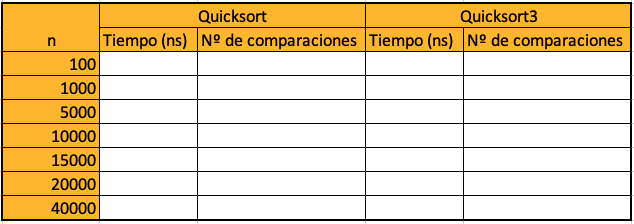


Una vez completada la tabla grafique sus resultados (de la forma que estime más conveniente presentarlos) e incluya el gráfico al final de  este documento. Para tomar el tiempo que demora un proceso puede usar la función `time.gettime_ns(0)` que registra el tiempo actual en nanosegundos que han pasado desde el 1/1/1970 00:00 horas. Puede usarlo de la siguiente manera:

In [ ]:
import time
a = np.random.random(100)
t1 = time.clock_gettime_ns(0)
quicksort(a)
t2 = time.clock_gettime_ns(0)
print("el tiempo que demoró el proceso fue de ",(t2-t1),"nanosegundos")

NameError: ignored

Para contar las comparaciones puede usar variables globales que se incrementan convenientemente. Solo cuente las comparaciones que se hacen en el proceso de partición (dentro del `for`). Tenga sumo cuidado de asegurarse que cada vez que se corra el experimento (ordenamiento del arreglo generado al azar por los dos métodos) estos reciban una copia del arreglo original desordenado y no una referencia al arreglo que ya fue ordenado en una instancia anterior. Programe las instrucciones que ejecuten el experimento descrito anteriormente, en el siguiente recuadro:

In [ ]:
def QSvsQS3(n):
  QS = np.zeros(15)
  QS3 = np.zeros(15)
  comp_QS = np.zeros(15)
  comp_QS3 = np.zeros(15)
  for i in range(15):
    a = np.random.random(n)
    t1 = time.clock_gettime_ns(0)
    comp_QS[i] = quicksort(a)
    t2 = time.clock_gettime_ns(0)

    QS[i] = t2-t1

    t3 = time.clock_gettime_ns(0)
    comp_QS3[i] = quicksort3(a)
    t4 = time.clock_gettime_ns(0)

    QS3[i] = t4-t3

  prom_T = 0
  prom_T3 = 0
  prom_comp = 0
  prom_comp3 = 0

  for i in range(15):
    prom_T += QS[i]
    prom_T3 += QS3[i]
    prom_comp += comp_QS[i]
    prom_comp3 += comp_QS3[i]

  return [prom_T/15, prom_comp/15,  prom_T3/15, prom_comp3/15]

In [ ]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

### Tabla gráfica ###
ns = [100,1000, 5000, 10000, 15000, 20000, 40000]
datos = [QSvsQS3(x) for x in ns]
cabecera = ["Tiempo(ns) QS","N° comparaciones QS","Tiempo(ns) QS3","N° comparaciones QS3"]
data = pd.DataFrame(datos)
data.columns = cabecera
data.index = ns

data

,Tiempo(ns) QS,N° comparaciones QS,Tiempo(ns) QS3,N° comparaciones QS3
100,4.124351e+05,638.933333,4.779645e+05,422.0
1000,6.968232e+06,10959.466667,6.416195e+06,7709.0
5000,4.112567e+07,70418.066667,3.567363e+07,48989.0
10000,1.180216e+08,157481.533333,8.904727e+07,107966.0
15000,1.666604e+08,246874.666667,1.196261e+08,173153.0
20000,1.830805e+08,335373.600000,1.381572e+08,235919.0
40000,4.579643e+08,744802.466667,3.441971e+08,511824.0


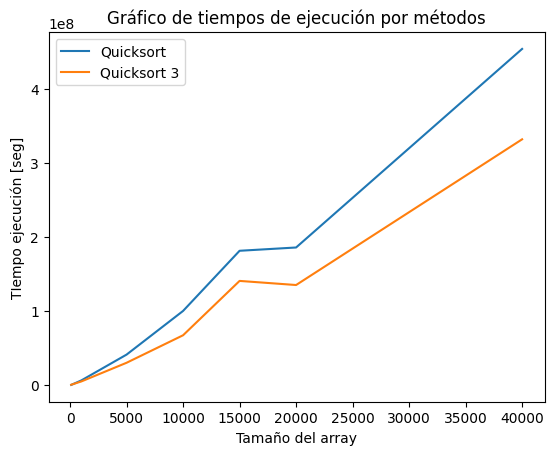

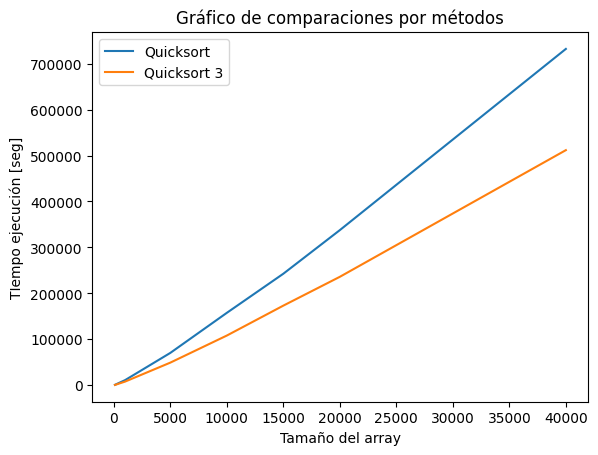

In [ ]:
### Gráfico de lineas ###
ns = [100,1000, 5000, 10000, 15000, 20000, 40000]

T = [QSvsQS3(x)[0] for x in ns]
T3 = [QSvsQS3(x)[2] for x in ns]
C = [QSvsQS3(x)[1] for x in ns]
C3 = [QSvsQS3(x)[3] for x in ns]

# Gráfico tiempo
fig, ax = plt.subplots()
ax.plot(ns, T, ns, T3)
plt.xlabel("Tamaño del array")
plt.ylabel("TIempo ejecución [nanoseg]")
plt.title("Gráfico de tiempos de ejecución por método")
plt.legend(["Quicksort","Quicksort 3"])
plt.show()

# Gráfico comparaciones
fig, ax = plt.subplots()
ax.plot(ns, C, ns, C3)
plt.xlabel("Tamaño del array")
plt.ylabel("Número de comparaciones")
plt.title("Gráfico de número de comparaciones por método")
plt.legend(["Quicksort","Quicksort 3"])
plt.show()